In [1]:
# Import the required libraries 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import json

In [2]:
print ("Read Dataset ... ")
def read_dataset(path):
    return json.load(open(path)) 


Data = read_dataset('trainfile2.json')

Read Dataset ... 


In [3]:
#Convert everything to lowercase.  Probably could clean up a little more
def generate_text(data):
    text_data = [" ".join(doc['ingredients']).lower() for doc in data]
    return text_data 

In [4]:
X = generate_text(Data)
Y = [doc['cuisine'] for doc in Data]

In [123]:
for i in range(5):
    print(Y[i],'|',X[i],'\n')

greek | romaine lettuce black olives grape tomatoes garlic pepper purple onion seasoning garbanzo beans feta cheese crumbles 

filipino | eggs pepper salt mayonaise cooking oil green chilies grilled chicken breasts garlic powder yellow onion soy sauce butter chicken livers 

indian | water vegetable oil wheat salt 

indian | black pepper shallots cornflour cayenne pepper onions garlic paste milk butter salt lemon juice water chili powder passata oil ground cumin boneless chicken skinless thigh garam masala double cream natural yogurt bay leaf 

jamaican | plain flour sugar butter eggs fresh ginger root salt ground cinnamon milk vanilla extract ground ginger powdered sugar baking powder 



In [9]:
print ("Divide into training and validation sets")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Divide into training and validation sets


In [10]:
print(len(X_train),len(y_train),len(X_test),len(y_test))

25454 25454 6364 6364


In [133]:
#build a tfidf transformer on training set.  use it on testing set.
tfidf = TfidfVectorizer(binary=True)
def tfidf_features(txt, flag):
    if flag == "train":
        x = tfidf.fit_transform(txt)
    else:
        x = tfidf.transform(txt)
    x = x.astype('float16')
    return x 

XX = tfidf_features(X_train, flag="train")
XX_test = tfidf_features(X_test, flag="test")
XX_final = tfidf_features(X, flag="test")

#print for debugging
print(XX_final)

  (0, 165)	0.2059
  (0, 220)	0.1393
  (0, 470)	0.1454
  (0, 676)	0.3335
  (0, 883)	0.303
  (0, 1011)	0.387
  (0, 1016)	0.105
  (0, 1085)	0.3486
  (0, 1411)	0.269
  (0, 1720)	0.2617
  (0, 1724)	0.164
  (0, 1839)	0.102
  (0, 2008)	0.2378
  (0, 2119)	0.3484
  (0, 2222)	0.229
  (0, 2560)	0.1514
  (1, 296)	0.231
  (1, 339)	0.1489
  (1, 483)	0.1434
  (1, 497)	0.2147
  (1, 612)	0.2194
  (1, 826)	0.1638
  (1, 1016)	0.104
  (1, 1106)	0.1559
  (1, 1113)	0.546
  :	:
  (31816, 2689)	0.2612
  (31816, 2720)	0.1035
  (31816, 2722)	0.1724
  (31816, 2729)	0.1186
  (31817, 184)	0.2377
  (31817, 220)	0.1646
  (31817, 445)	0.2734
  (31817, 492)	0.273
  (31817, 497)	0.2563
  (31817, 520)	0.1938
  (31817, 539)	0.2053
  (31817, 790)	0.2251
  (31817, 967)	0.1471
  (31817, 1016)	0.124
  (31817, 1106)	0.1859
  (31817, 1119)	0.1467
  (31817, 1258)	0.2869
  (31817, 1725)	0.1554
  (31817, 1733)	0.2568
  (31817, 1839)	0.12054
  (31817, 2117)	0.4285
  (31817, 2171)	0.1059
  (31817, 2452)	0.1589
  (31817, 2560)	0.178

In [137]:
# Label Encoding - Target 
lb = LabelEncoder()
yy = lb.fit_transform(y_train)
yy_final = lb.fit_transform(Y)

In [111]:

import warnings
warnings.filterwarnings("ignore")  #not a great idea in general, but it cleans up the output when using scikit-learn
#obviously anything that triggers an error won't get ignored

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

  (0, 43)	0.331
  (0, 165)	0.2189
  (0, 220)	0.1481
  (0, 559)	0.1676
  (0, 569)	0.254
  (0, 1016)	0.1116
  (0, 1073)	0.3062
  (0, 1119)	0.132
  (0, 1326)	0.3643
  (0, 1416)	0.2717
  (0, 1446)	0.3179
  (0, 1576)	0.1854
  (0, 1839)	0.1084
  (0, 2086)	0.1855
  (0, 2171)	0.0953
  (0, 2390)	0.3083
  (0, 2540)	0.2388
  (0, 2700)	0.1531
  (0, 2720)	0.1781
  (1, 165)	0.2277
  (1, 470)	0.1608
  (1, 492)	0.2554
  (1, 520)	0.1814
  (1, 906)	0.344
  (1, 937)	0.1681
  :	:
  (25452, 2255)	0.3003
  (25452, 2286)	0.209
  (25452, 2336)	0.2151
  (25452, 2351)	0.2225
  (25452, 2639)	0.1992
  (25453, 46)	0.2688
  (25453, 138)	0.3357
  (25453, 227)	0.3801
  (25453, 312)	0.1752
  (25453, 339)	0.1401
  (25453, 483)	0.135
  (25453, 496)	0.1805
  (25453, 514)	0.2773
  (25453, 540)	0.2068
  (25453, 617)	0.1697
  (25453, 1016)	0.09784
  (25453, 1119)	0.1157
  (25453, 1725)	0.1226
  (25453, 1898)	0.3142
  (25453, 1963)	0.1509
  (25453, 2171)	0.0835
  (25453, 2232)	0.2058
  (25453, 2239)	0.3552
  (25453, 2243)	0.

In [138]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(XX, yy)

rn = RadiusNeighborsClassifier(radius=1.211681111)
rn.fit(XX, yy)
data = rn.predict(XX_test)
# print(data)

knn_final = KNeighborsClassifier(n_neighbors=5)
knn_final.fit(XX_final, yy_final)

# bc = Birch(n_clusters=5)
# bnn.fit(XX, yy)
# data = bnn.predict(XX_test)
# print(data)

# mknn = MiniBatchKMeans(n_clusters=5)
# mknn.fit(XX, yy)
# data = mknn.predict(XX_test)
# print(data)

# sc = SpectralClustering(n_clusters=5)
# sc.fit(XX, yy)
# data = sc.predict(XX_test)
# print(data)

# gm = GaussianMixture(n_components=5)
# gm.fit(XX, yy)
# data = gm.predict(XX_test)
# print(data)

# hdbscan = HDBSCAN(min_cluster_size=5)
# hdbscan.fit(XX, yy)
# data = hdbscan.fit_predict(XX_test.toarray()) 
# print(data)



KNeighborsClassifier()

In [142]:
yy_test = knn.predict(XX_test)
yy_pred = lb.inverse_transform(yy_test)
data_pred = lb.inverse_transform(data)

yy_final_test = knn_final.predict(XX_final)
yy_final_pred = lb.inverse_transform(yy_final_test)

In [129]:
import pandas as pd

In [146]:
#generate predictions into csv file
df = pd.DataFrame({'Predicted': yy_final_pred})
df
df.to_csv('kaggle_predictions.csv', index=False)

In [144]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("K-Means Nearest Neighbor Accuracy:",metrics.accuracy_score(y_test, yy_pred))
print("Radius Clustering Accuracy:",metrics.accuracy_score(y_test, data_pred))
print("Final/Total Accuracy:",metrics.accuracy_score(Y, yy_final_pred))

K-Means Nearest Neighbor Accuracy: 0.7344437460716531
Radius Clustering Accuracy: 0.6937460716530484
Final/Total Accuracy: 0.8203532591614809


In [41]:
class_names =[]
for i in range(len(y_test)):
    if y_test[i] not in class_names:
        class_names.append(y_test[i])

In [42]:
#Confusion matrix stolen from
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

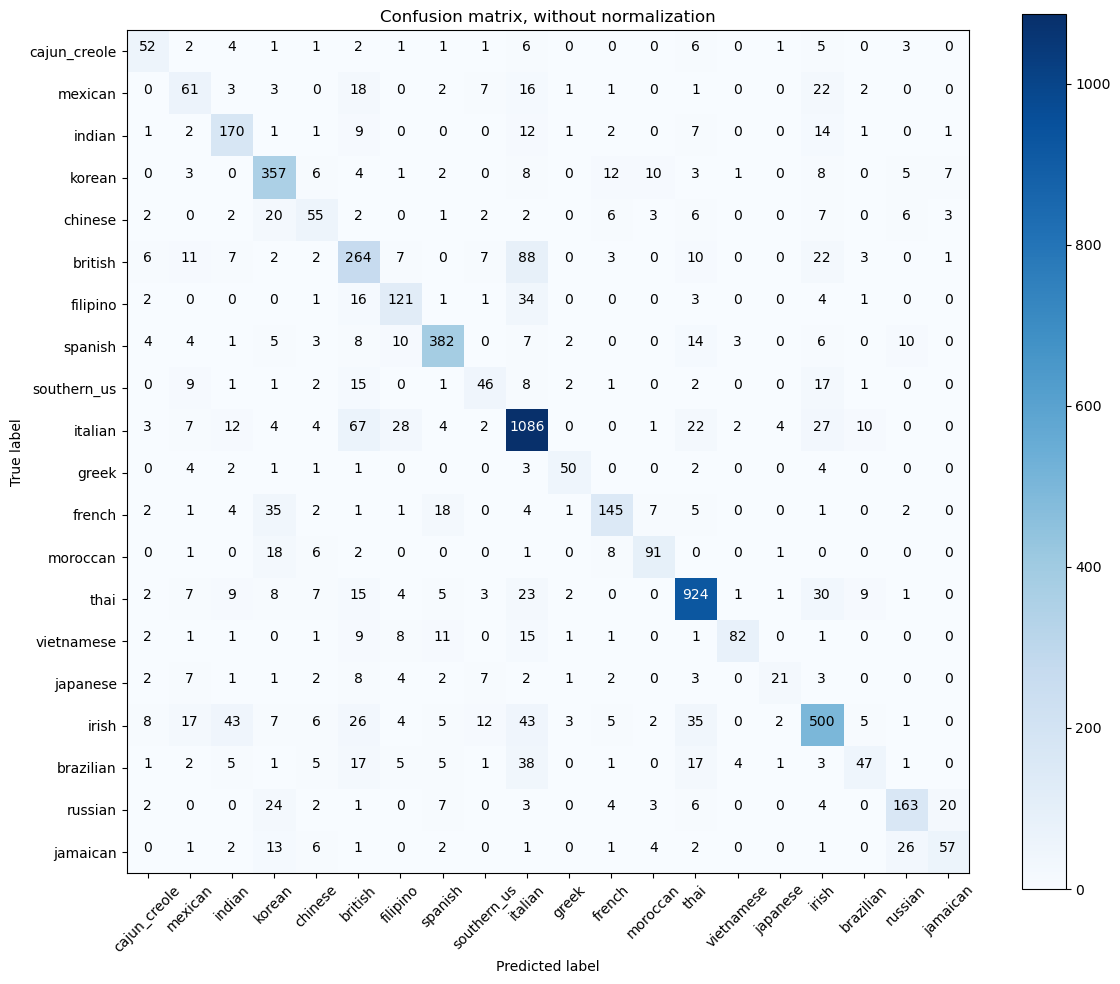

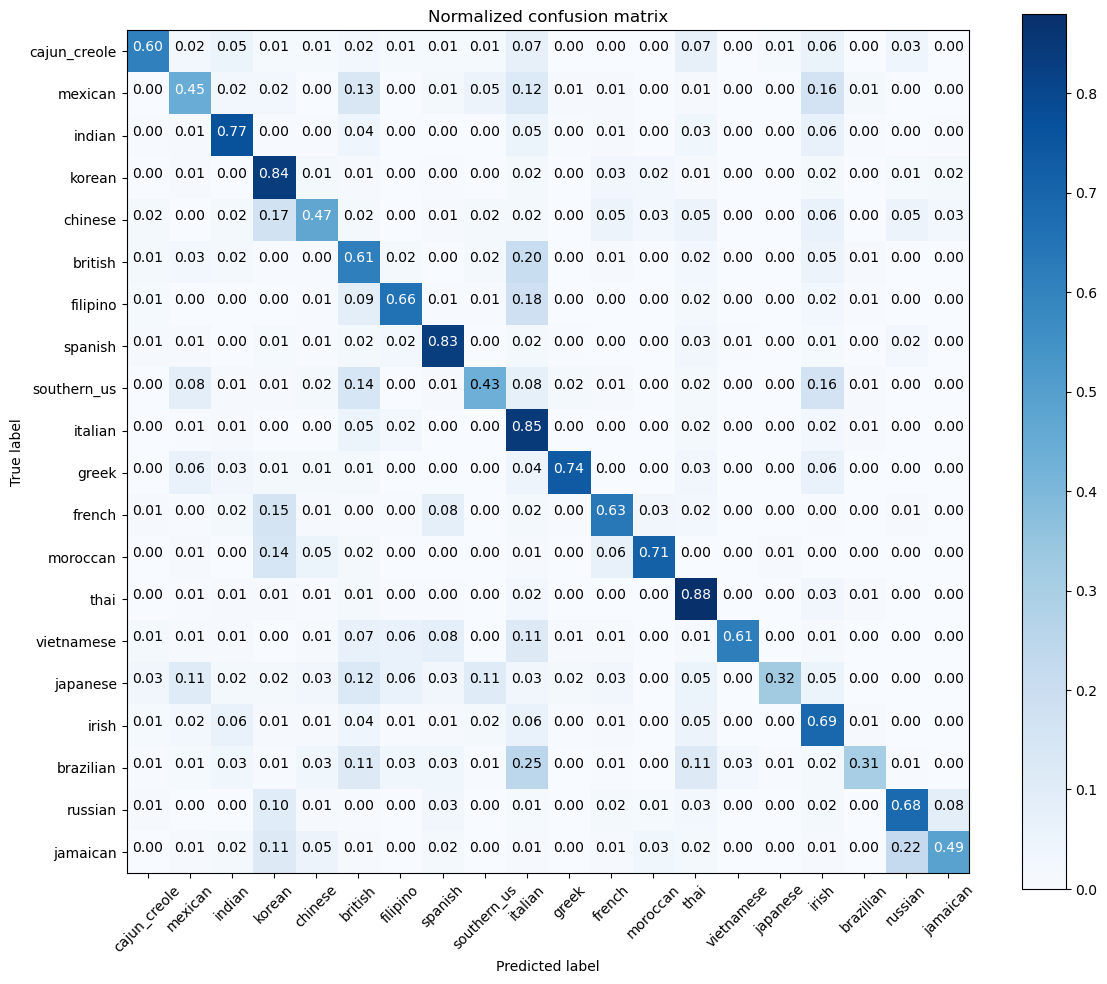

In [43]:
#Confusion matrix stolen from
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
from sklearn.metrics import confusion_matrix
import numpy as np

cnf_matrix = confusion_matrix(y_test, yy_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.savefig("figure1.pdf", dpi="figure")
# Plot normalized confusion matrix
plt.figure(figsize=(12, 10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.savefig("figure2.pdf", dpi="figure")
plt.show()